# **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn.metrics import log_loss
from datetime import date
from pandas.tseries.offsets import MonthEnd
import pandas_profiling as pp
import seaborn
import os
import tensorflow as tf
import cv2
import random
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression as LR
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error as ms
import seaborn as sns
import statistics
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import random
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from scipy import stats as s
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import decomposition
import joblib
from joblib import dump,load

In [ ]:
!pip install idx2numpy
import idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=d386fc3cffa5c27f0f8990866de3a48f42ca53b89876e55985e85fb2c8760e4b
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Question 1**

**(50 points) For this question you have to use Abalone Dataset. The dataset contains 9
variables out of which the last column is the output variable and the other 8 are input
attributes. You may need feature normalisation.
(a) A file named ‘Regression.py’ containing a ‘Regression’ class is attached with the
assignment. You need to fill the suitable code in this class. In this class you can use
‘.fit()’ of ‘LinearRegression’ from the sklearn. However, you have to write ‘.predict()’
from scratch using the outcomes of ‘.fit()’.**

In [ ]:
#reading data 
ab_data = pd.read_csv("/content/drive/MyDrive/abalone.csv",header=None)

In [ ]:
ab_data.rename(columns={0: 'Sex', 1: 'Length', 2: "Diameter", 3: "Height",4 :"Whole weight", 5:"Shucked weight" , 6:"Viscera weight", 7:"Shell weight", 8:"Rings"}, inplace=True)

In [ ]:
labels = ab_data['Rings']
ab_data.drop('Rings',axis='columns', inplace=True)

In [ ]:
#label encoding for column Sex
for i in range(0,ab_data.shape[0]):
  if (ab_data.loc[i,'Sex'] == 'M'):
    ab_data.loc[i,'Sex'] = 0
  elif (ab_data.loc[i,'Sex'] == 'F'):
    ab_data.loc[i,'Sex'] = 1
  elif (ab_data.loc[i,'Sex'] == 'I'):
    ab_data.loc[i,'Sex'] = 2

In [ ]:
ab_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
#normalisation of data
mean = ab_data.mean(axis=0)
std = ab_data.std(axis=0)
ab_data = (ab_data - mean) / std

In [ ]:
ab_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-1.15421,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140
1,-1.15421,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842
2,0.0537917,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114
3,-1.15421,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222
4,1.26179,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599
...,...,...,...,...,...,...,...,...
4172,0.0537917,0.341468,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053
4173,-1.15421,0.549640,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666
4174,-1.15421,0.632909,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895
4175,0.0537917,0.841081,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690


In [ ]:
def split_train_test(X,y,test_ratio):
    r = test_ratio*100
    #have random indices
    arr_rand = np.random.rand(X.shape[0])
    #select indices of given ratio
    split = arr_rand < np.percentile(arr_rand, r)
    #spliting of data
    X_test = X[split]
    y_test = y[split]
    X_train =  X[~split]
    y_train = y[~split]

    return X_train, X_test, y_train.to_list(), y_test.to_list()

In [ ]:
def mse(y_test, y_pred):
  y_mse = 0
  n = len(y_test)
  for i in range(0,n):
    y_mse += ((y_pred[i] - y_test[i])**2)

  return y_mse/n

In [ ]:
def k_fold(X, y, k, fold_num):
     

      if isinstance(X,pd.core.frame.DataFrame):
        X = X.to_numpy()
        y = y.to_numpy()

      size = y.size
      test_size = int (size*(1/k))
      
      fold_num -= 1
      test_start = fold_num*test_size
      test_finish = (fold_num+1)*test_size
      
      
      #fetching test data
      X_test = X[test_start:test_finish,:]
      y_test = y[test_start:test_finish]


      #preparing traninig data
      X = np.delete(X, slice(test_start, test_finish), axis=0)
      y = np.delete(y, slice(test_start, test_finish), axis=0)

      return X,X_test,y,y_test

In [ ]:
def mse_buitin(y_test, y_pred):
  return ms(y_test,y_pred)


In [ ]:
class Regression(object):
    """docstring for Regression."""
    def __init__(self, arg1,arg2):
      super(Regression, self).__init__()
      self.arg1 = arg1
      self.arg2 = arg2
      
    """You can give any required inputs to the fit()"""
    def fit(self, X_train, y_train):
      
      clf = LR()
      clf.fit(X_train,y_train)

      self.coeff = clf.coef_
      theta0 = clf.intercept_
      self.coeff = np.insert(self.coeff,self.coeff.size,theta0)
      return self.coeff
    """Here you can use the fit() from the LinearRegression of sklearn"""


    """ You can add as many methods according to your requirements, but training must be using fit(), and testing must be with predict()"""

    """ Write it from scratch usig outcomes of fit()"""

    """Fill your code here. predict() should only take X_test and return predictions."""
    def predict(self, X_test):
      y_pred = []
      n = X_test.shape[0]
      l = len(X_test[0])
      for i in range(0,n):
        temp = self.coeff[l]
        for j in range(0,l):
          temp += self.coeff[j]*X_test[i][j]
        y_pred.append(temp)
      y_pred = np.array(y_pred)
      return y_pred



In [ ]:
def fit_on_folds(x,y,k):
      train_mse_org = []
      test_mse_org = []
      train_mse_builtin = []
      test_mse_builtin = []
      fold = k+1
      for i in range(1,fold):
        X_train,X_test,y_train,y_test = k_fold(x,y,k,i)
        model = Regression(X_train,y_train)
        model.fit(X_train,y_train)
        dump(model,f'/content/drive/MyDrive/ML_Assigment2/q1_models/own_reg_fold_{i}')
        #model = load(f'/content/drive/MyDrive/ML_Assigment2/q1_models/own_reg_fold_{i}')
        y_pred_test = model.predict(X_test)
        test_mse_org.append(mse(y_test, y_pred_test))
        test_mse_builtin.append(mse_buitin(y_test, y_pred_test))

        y_pred_train = model.predict(X_train)
        train_mse_org.append(mse(y_train, y_pred_train))
        train_mse_builtin.append(mse_buitin(y_train, y_pred_train))
        
      return np.array(train_mse_org), np.array(test_mse_org), np.array(train_mse_builtin), np.array(test_mse_builtin)

**Use the ‘Regression’ class to prepare a table containing training and validation mean
square (MSE) error for each fold. Also, report the mean training and validation MSE.
Implement your own MSE function. Also, compare the output of your function with
MSE from the sklearn.**

In [ ]:
train_mse_org, test_mse_org, train_mse_builtin, test_mse_builtin = fit_on_folds(ab_data,labels,5)

In [ ]:
df = pd.DataFrame()
df['Train MSE'] = train_mse_org
df['Train MSE Built In'] = train_mse_builtin
df['Test MSE'] = test_mse_org
df['Test MSE Built In'] = test_mse_builtin

In [ ]:
df

,Train MSE,Train MSE Built In,Test MSE,Test MSE Built In
0,3.774039,3.774039,9.880113,9.880113
1,5.333944,5.333944,3.024386,3.024386
2,4.638637,4.638637,5.837691,5.837691
3,5.114791,5.114791,3.754576,3.754576
4,5.039104,5.039104,4.044819,4.044819


**Now, instead of using the ‘Regression’ class, use normal equations1 to make the
predictions, and repeat the table in part (b) above.**

In [ ]:
class Regression_On_Eq(object):
    """docstring for Regression."""
    def __init__(self, arg1,arg2):
      self.arg1 = arg1
      self.arg2 = arg2

      
    """You can give any required inputs to the fit()"""
    def eq_coeff(self ,X_train, y_train):
      #X_train = np.c_[np.ones(X_train.shape[0]), X_train]
      X_train_T = np.transpose(X_train)
      mul_term = np.dot(X_train_T, X_train)
      mul_term = mul_term.astype('float')
      temp1 = np.linalg.inv(mul_term)
      temp2 = np.dot(X_train_T, y_train)
      final_coeff = np.dot(temp1,temp2)
      return final_coeff
    """Here you can use the fit() from the LinearRegression of sklearn"""


    """ You can add as many methods according to your requirements, but training must be using fit(), and testing must be with predict()"""

    """ Write it from scratch usig outcomes of fit()"""

    """Fill your code here. predict() should only take X_test and return predictions."""
    def predict_func(self, coeff, X_test):
      y_pred = []
      n = X_test.shape[0]
      l = X_test.shape[1]
      for i in range(0,n):
        temp = coeff[l]
        for j in range(0,l):
          temp += coeff[j]*X_test[i][j]
        y_pred.append(temp)
      return np.array(y_pred)


    def fit_on_folds(self, k):
      train_mse_org = []
      test_mse_org = []
      train_mse_builtin = []
      test_mse_builtin = []
      fold = k+1
      for i in range(1,fold):
        X_train,X_test,y_train,y_test = k_fold(self.arg1[:],self.arg2[:],k,i)
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        X_test = np.c_[np.ones(X_test.shape[0]), X_test]
        coeff = self.eq_coeff(X_train,y_train)
        dump(coeff,f'/content/drive/MyDrive/ML_Assigment2/q1_models/eqn_reg_fold_{i}')
        #coeff = load(f'/content/drive/MyDrive/ML_Assigment2/q1_models/eqn_reg_fold_{i}')
        y_pred_test = np.matmul(X_test,coeff)
        test_mse_org.append(mse(y_test, y_pred_test))
        test_mse_builtin.append(mse_buitin(y_test, y_pred_test))

        y_pred_train = np.matmul(X_train,coeff)
        train_mse_org.append(mse(y_train, y_pred_train))
        train_mse_builtin.append(mse_buitin(y_train, y_pred_train))
        
      return np.array(train_mse_org), np.array(test_mse_org), np.array(train_mse_builtin), np.array(test_mse_builtin)


In [ ]:
model1 = Regression_On_Eq(ab_data,labels)

In [ ]:
train_mse_org, test_mse_org, train_mse_builtin, test_mse_builtin = model1.fit_on_folds(5)

In [ ]:
df = pd.DataFrame()
df['Train MSE'] = train_mse_org
df['Train MSE Built In'] = train_mse_builtin
df['Test MSE'] = test_mse_org
df['Test MSE Built In'] = test_mse_builtin

In [ ]:
df

,Train MSE,Train MSE Built In,Test MSE,Test MSE Built In
0,3.774039,3.774039,9.880113,9.880113
1,5.333944,5.333944,3.024386,3.024386
2,4.638637,4.638637,5.837691,5.837691
3,5.114791,5.114791,3.754576,3.754576
4,5.039104,5.039104,4.044819,4.044819


**Finally, use the ‘LinearRegression’ from the sklearn to make the predictions, and
prepare a similar table as in (a) and (b). Is there any deviation between the performance
of the three approaches? If yes, why?**

In [ ]:
class Regression(object):
    """docstring for Regression."""
    def __init__(self, arg1,arg2):
      super(Regression, self).__init__()
      self.arg1 = arg1
      self.arg2 = arg2

      
    """You can give any required inputs to the fit()"""
   
    """Here you can use the fit() from the LinearRegression of sklearn"""


    """ You can add as many methods according to your requirements, but training must be using fit(), and testing must be with predict()"""

    """ Write it from scratch usig outcomes of fit()"""

    """Fill your code here. predict() should only take X_test and return predictions."""
  


    def fit_on_folds(self, k):
      train_mse_org = []
      test_mse_org = []
      train_mse_builtin = []
      test_mse_builtin = []
      fold = k+1
      for i in range(1,fold):
        X_train,X_test,y_train,y_test = k_fold(self.arg1[:],self.arg2[:],k,i)
        clf = LR()
        clf.fit(X_train,y_train)
        dump(clf,f'/content/drive/MyDrive/ML_Assigment2/q1_models/skl_reg_fold_{i}')
        #clf = load(f'/content/drive/MyDrive/ML_Assigment2/q1_models/skl_reg_fold_{i}')
        y_pred_test = clf.predict(X_test)
        test_mse_org.append(mse(y_test, y_pred_test))
        test_mse_builtin.append(mse_buitin(y_test, y_pred_test))

        y_pred_train = clf.predict(X_train)
        train_mse_org.append(mse(y_train, y_pred_train))
        train_mse_builtin.append(mse_buitin(y_train, y_pred_train))
        
      return np.array(train_mse_org), np.array(test_mse_org), np.array(train_mse_builtin), np.array(test_mse_builtin)


In [ ]:
model2 = Regression(ab_data,labels)

In [ ]:
train_mse_org, test_mse_org, train_mse_builtin, test_mse_builtin = model2.fit_on_folds(5)

In [ ]:
df = pd.DataFrame()
df['Train MSE'] = train_mse_org
df['Train MSE Built In'] = train_mse_builtin
df['Test MSE'] = test_mse_org
df['Test MSE Built In'] = test_mse_builtin

In [ ]:
df

,Train MSE,Train MSE Built In,Test MSE,Test MSE Built In
0,3.774039,3.774039,9.880113,9.880113
1,5.333944,5.333944,3.024386,3.024386
2,4.638637,4.638637,5.837691,5.837691
3,5.114791,5.114791,3.754576,3.754576
4,5.039104,5.039104,4.044819,4.044819


# **Question 2**

In [ ]:
#reading data
db_data = pd.read_csv("/content/drive/MyDrive/diabetes2.csv")

In [ ]:
db_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Visualize and analyze the dataset.**

In [ ]:
db_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
db_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


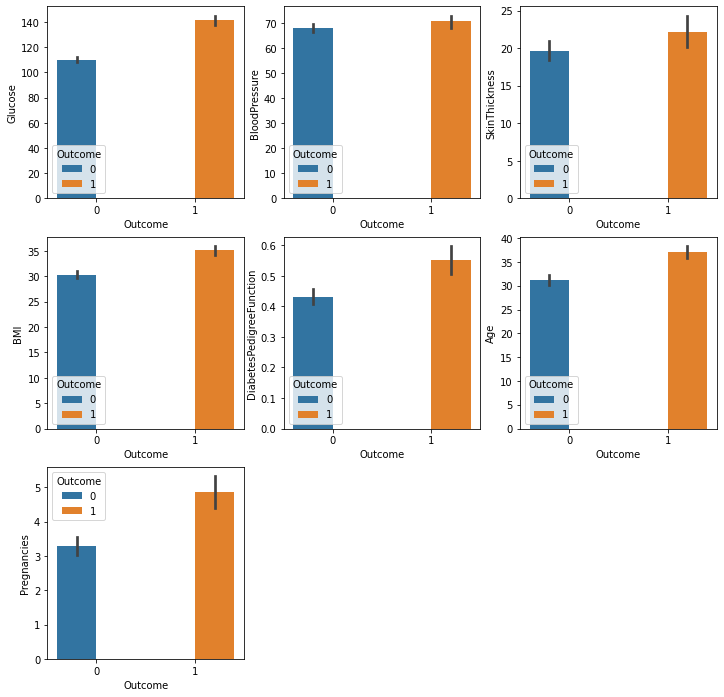

In [ ]:
#visualising data against class
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=db_data,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=db_data,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=db_data,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=db_data,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=db_data,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=db_data,hue="Outcome")
plt.subplot(3,3,7)
sns.barplot(x='Outcome',y='Pregnancies',data=db_data,hue="Outcome")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

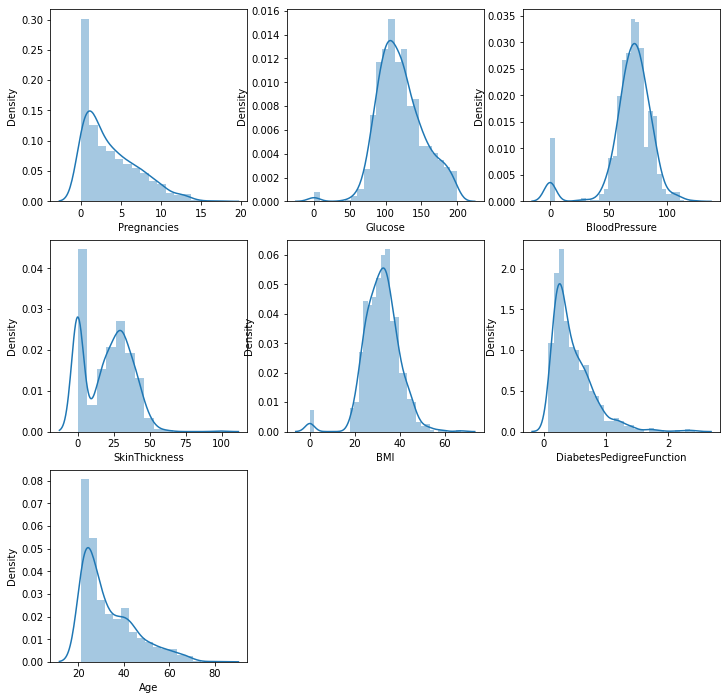

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.distplot(db_data.Pregnancies)
plt.subplot(3,3,2)
sns.distplot(db_data.Glucose)
plt.subplot(3,3,3)
sns.distplot(db_data.BloodPressure)
plt.subplot(3,3,4)
sns.distplot(db_data.SkinThickness)
plt.subplot(3,3,5)
sns.distplot(db_data.BMI)
plt.subplot(3,3,6)
sns.distplot(db_data.DiabetesPedigreeFunction)
plt.subplot(3,3,7)
sns.distplot(db_data.Age)

In [ ]:
labels = db_data['Outcome']
db_data.drop('Outcome',axis='columns', inplace=True)

In [ ]:
from sklearn import decomposition
pca= decomposition.PCA()

In [ ]:
pca.n_components = 2
p_data= pca.fit_transform(db_data)
print(p_data.shape)

(768, 2)


In [ ]:
p_data=np.vstack((p_data.T,labels)).T

In [ ]:
pca_df = pd.DataFrame(data=p_data, columns=("1st principal", "2nd principal", "label"))

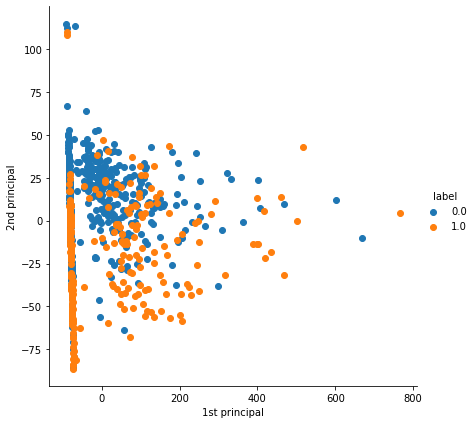

In [ ]:
sns.FacetGrid(pca_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

In [ ]:
type(db_data)

pandas.core.frame.DataFrame

In [ ]:
#normalisation of data
mean = db_data.mean(axis=0)
std = db_data.std(axis=0)
db_data = (db_data - mean) / std

**A file with the name ‘LogRegression.py’ containing a ‘LogRegression’ class is attached
with the assignment. You have to write this class from the scratch without using sklearn.**

In [ ]:
class LogRegression(object):
  def __init__(self,learning_rate=0.1):
    self.learning_rate = learning_rate


  def fit(self,arg1,arg2):
    self.x_train = arg1
    self.y_train = arg2
    self.W = np.random.randn(self.x_train.shape[1])
    self.row, self.col = self.x_train.shape
    for i in range(0,self.row):
      mul = np.matmul(self.W,self.x_train[i].T)
      sig = self.sigmoid(mul)
      for j in range(0,self.col):
        self.W[j] += self.learning_rate *(self.y_train[i] - sig) * self.x_train[i][j] 

  def sigmoid(self,x):
    return expit(x)

  def predict(self,x_test):
    y_pred = []
    probs = []
    n = x_test.shape[0]
    for i in range(0,n):
      mul = np.matmul(self.W,x_test[i].T)
      prob = expit(mul)
      probs.append(prob)
      if prob > 0.5:
        y_pred.append(1)
      else:
        y_pred.append(0)
    return np.array(y_pred), np.array(probs)
  
  def fit_reg(self, arg1, arg2, lamba):
    self.x_train = arg1
    self.y_train = arg2
    self.W = np.random.randn(self.x_train.shape[1])
    self.row, self.col = self.x_train.shape
    for i in range(0,self.row):
      mul = np.matmul(self.W,self.x_train[i].T)
      sig = self.sigmoid(mul)
      for j in range(0,self.col):
        self.W[j] += self.learning_rate*((self.y_train[i] - sig) * self.x_train[i][j] + (lamda * 2 * self.W[j]))

  def loss_func(self,prob,y_test):
    loss = 0
    n = y_test.shape[0]
    for i in range(0, n):
      if y_test[i] == 1:
        tmp = prob[i]+10e-20
        loss += (- (y_test[i] * np.log(tmp)))
      else:
        tmp = (1-prob[i])+10e-20
        loss += (-((1 - y_test[i]) * np.log(tmp)))
    return (loss/n )

In [ ]:
def k_fold(X, y, k, fold_num):
     

      if isinstance(X,pd.core.frame.DataFrame):
        X = X.to_numpy()
        y = y.to_numpy()

      size = y.size
      test_size = int (size*(1/k))
      
      fold_num -= 1
      test_start = fold_num*test_size
      test_finish = (fold_num+1)*test_size
      
      
      #fetching test data
      X_test = X[test_start:test_finish,:]
      y_test = y[test_start:test_finish]

      # np.random.shuffle(X_test)
      # np.random.shuffle(y_test)

      #preparing traninig data
      X = np.delete(X, slice(test_start, test_finish), axis=0)
      y = np.delete(y, slice(test_start, test_finish), axis=0)

      # np.random.shuffle(X)
      # np.random.shuffle(y)

      return X,X_test,y,y_test

In [ ]:
def show_fold_loss(test_accuracy,train_accuracy,test_loss,train_loss):
  folds = ['Fold-1','Fold-2','Fold-3','Fold-4','Fold-5']
  df = pd.DataFrame({'Test Accuracy':test_accuracy,'Train Accuracy':train_accuracy,'Test Loss':test_loss,'Train Loss':train_loss},index=folds)
  print(df)
  df.plot()
  plt.title('Fold wise My logistics regression performance')
  plt.xlabel('Fold Number')
  plt.ylabel('Information')
  plt.legend()
  plt.show()


        Test Accuracy  Train Accuracy  Test Loss  Train Loss
Fold-1       0.745098        0.760976   0.515723    0.507901
Fold-2       0.692810        0.775610   0.593357    0.489247
Fold-3       0.758170        0.760976   0.513303    0.508734
Fold-4       0.803922        0.744715   0.474271    0.515341
Fold-5       0.784314        0.772358   0.482843    0.495631


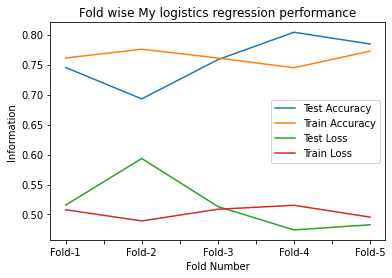

In [ ]:
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
for i in range(0,5):
  X_train,X_test,y_train,y_test = k_fold(db_data,labels,5,i+1)
  model = LogRegression()
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  model.fit(X_train,y_train)
  dump(model,f'/content/drive/MyDrive/ML_Assigment2/q2_models/own_logreg_fold_{i+1}')
  #model = load(f'/content/drive/MyDrive/ML_Assigment2/q2_models/own_logreg_fold_{i+1}')
  test_pred,test_prob = model.predict(X_test)
  test_accuracy.append(accuracy_score(y_test,test_pred))
  test_loss.append(model.loss_func(test_prob , y_test))
  train_pred , train_prob = model.predict(X_train)
  train_accuracy.append(accuracy_score(y_train,train_pred))
  train_loss.append(model.loss_func(train_prob , y_train))
show_fold_loss(test_accuracy,train_accuracy,test_loss,train_loss)

Lamda 0.0
        Test Accuracy  Train Accuracy  Test Loss  Train Loss
Fold-1       0.777778        0.762602   0.575117    0.545947
Fold-2       0.699346        0.782114   0.653678    0.532183
Fold-3       0.738562        0.769106   0.602108    0.561818
Fold-4       0.803922        0.752846   0.489197    0.545669
Fold-5       0.784314        0.777236   0.524762    0.526236


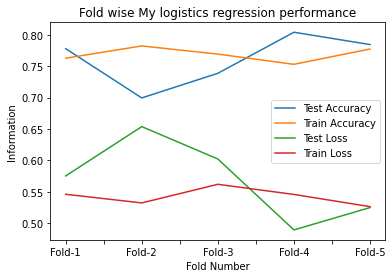

In [ ]:
max_acc = 0
lmbd = 0
for i in range(0,5):
  for lamda in np.around(np.arange(0,0.01,0.001),decimals=3):
    X_train,X_test,y_train,y_test = k_fold(db_data,labels,5,i+1)
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]
    model = LogRegression()
    model.fit_reg(X_train,y_train,lamda)
    test_pred , test_probabilities = model.predict(X_test)
    acc = accuracy_score(y_test,test_pred)
    if (max_acc<acc):
      max_acc = acc
      lmbd = lamda
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
print("Lamda",lmbd)
for i in range(0,5):
  X_train,X_test,y_train,y_test = k_fold(db_data,labels,5,i+1)
  model = LogRegression()
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  model.fit_reg(X_train,y_train,lmbd)
  dump(model,f'/content/drive/MyDrive/ML_Assigment2/q2_models/reg_logreg_fold_{i+1}')
  #model = load(f'/content/drive/MyDrive/ML_Assigment2/q2_models/reg_logreg_fold_{i+1}')
  test_pred,test_prob = model.predict(X_test)
  test_accuracy.append(accuracy_score(y_test,test_pred))
  test_loss.append(model.loss_func(test_prob , y_test))
  train_pred , train_prob = model.predict(X_train)
  train_accuracy.append(accuracy_score(y_train,train_pred))
  train_loss.append(model.loss_func(train_prob , y_train))
show_fold_loss(test_accuracy,train_accuracy,test_loss,train_loss)

        Test Accuracy  Train Accuracy  Test Loss  Train Loss
Fold-1       0.777778        0.777236   0.494783    0.466269
Fold-2       0.712418        0.788618   0.535687    0.457414
Fold-3       0.764706        0.786992   0.487572    0.468213
Fold-4       0.823529        0.757724   0.422343    0.486090
Fold-5       0.784314        0.786992   0.484676    0.469435


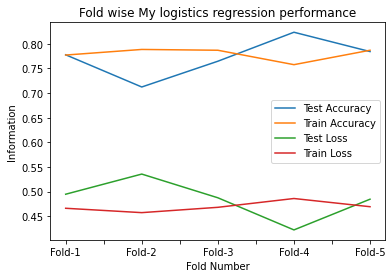

In [ ]:
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
for i in range(0,5):
  X_train,X_test,y_train,y_test = k_fold(db_data,labels,5,i+1)
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  model = LogisticRegression(penalty='none')
  model.fit(X_train,y_train)
  dump(model,f'/content/drive/MyDrive/ML_Assigment2/q2_models/skl_logreg_fold_{i+1}')
  #model = load(f'/content/drive/MyDrive/ML_Assigment2/q2_models/skl_logreg_fold_{i+1}')
  test_predict = model.predict(X_test)
  test_probability = model.predict_proba(X_test)
  test_loss.append(log_loss(y_test,test_probability))
  train_predict = model.predict(X_train)
  train_probability = model.predict_proba(X_train)
  train_loss.append(log_loss(y_train,train_probability))
  test_accuracy.append(accuracy_score(y_test,test_predict))
  train_accuracy.append(accuracy_score(y_train,train_predict))
show_fold_loss(test_accuracy,train_accuracy,test_loss,train_loss)

        Test Accuracy  Train Accuracy  Test Loss  Train Loss
Fold-1       0.784314        0.782114   0.493598    0.466308
Fold-2       0.712418        0.786992   0.535564    0.457445
Fold-3       0.764706        0.785366   0.487254    0.468247
Fold-4       0.823529        0.759350   0.422431    0.486120
Fold-5       0.784314        0.786992   0.484668    0.469466


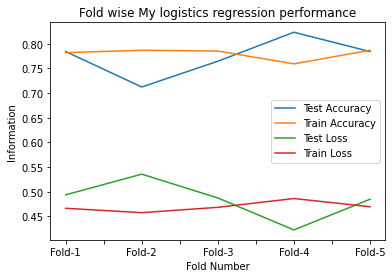

In [ ]:
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
for i in range(0,5):
  X_train,X_test,y_train,y_test = k_fold(db_data,labels,5,i+1)
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  model = LogisticRegression(penalty='l2')
  model.fit(X_train,y_train)
  dump(model,f'/content/drive/MyDrive/ML_Assigment2/q2_models/own_reg_logreg_fold_{i+1}')
  #model = load(f'/content/drive/MyDrive/ML_Assigment2/q2_models/own_reg_logreg_fold_{i+1}')
  test_predict = model.predict(X_test)
  test_probability = model.predict_proba(X_test)
  test_loss.append(log_loss(y_test,test_probability))
  train_predict = model.predict(X_train)
  train_probability = model.predict_proba(X_train)
  train_loss.append(log_loss(y_train,train_probability))
  test_accuracy.append(accuracy_score(y_test,test_predict))
  train_accuracy.append(accuracy_score(y_train,train_predict))
show_fold_loss(test_accuracy,train_accuracy,test_loss,train_loss)

# **Question 3**

 **Defining File Path**

In [ ]:
# path to data
p_train_images = 'drive/MyDrive/SML/Assignment3/Dataset/train-images/train-images.idx3-ubyte'
p_train_labels = 'drive/MyDrive/SML/Assignment3/Dataset/train-labels/train-labels.idx1-ubyte'
p_test_images = 'drive/MyDrive/SML/Assignment3/Dataset/t10k-images/t10k-images.idx3-ubyte'
p_test_labels = 'drive/MyDrive/SML/Assignment3/Dataset/t10k-labels/t10k-labels.idx1-ubyte'

**Loading MNIST Dataset**

In [ ]:
def read_images_labels(images_filepath, labels_filepath):
  images = idx2numpy.convert_from_file(images_filepath)
  labels = idx2numpy.convert_from_file(labels_filepath)
  return images, labels


def MnistDataloader(p_train_images, p_train_labels, p_test_images, p_test_labels):
  x_train, y_train = read_images_labels(p_train_images, p_train_labels)
  x_test, y_test = read_images_labels(p_test_images, p_test_labels)
  return (x_train,y_train),(x_test, y_test)

# Load MINST dataset
(x_train, y_train), (x_test, y_test) = MnistDataloader(p_train_images, p_train_labels, p_test_images, p_test_labels)
    
              


In [ ]:
unique_labels = np.unique(y_train)

In [ ]:
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Visualize 5 samples from each class in the form of images.** 

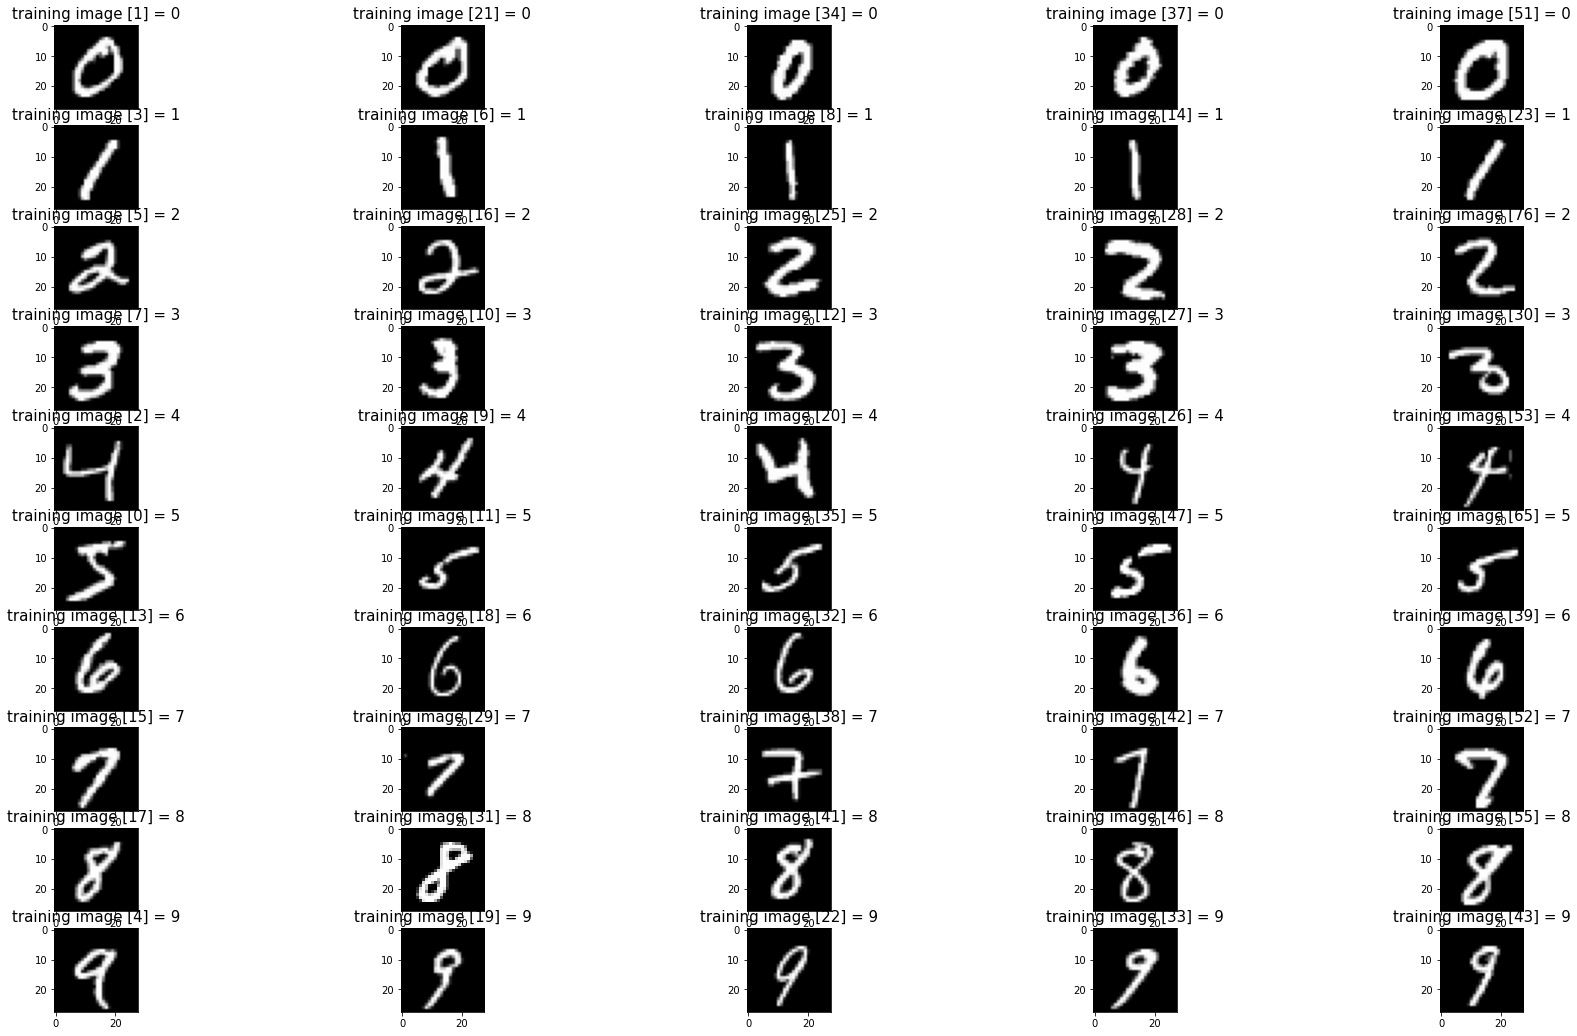

In [ ]:
#function to show image
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


images = []
titles = []



for i in unique_labels:
  count = 0
  for k in range(0,len(y_train)):
      if y_train[k] == i:
        images.append(x_train[k])
        titles.append('training image [' + str(k) + '] = ' + str(y_train[k]))   
        count=count+1 
      if count == 5:
        break

#showing 5 images of each class
show_images(images, titles)


 



In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],-1))
x_test = np.reshape(x_test,(x_test.shape[0],-1))

In [ ]:
# normalizing data
x_train = np.array(x_train).astype('float')/255
x_test = np.array(x_test).astype('float')/255


In [ ]:
model = LogRegressionRegularizationOVO(x_train,y_train,unique_labels)
model.fit()

In [ ]:
tmp = model.predict(x_test)

In [ ]:
accuracy_score(y_test,tmp)

0.1009

In [ ]:
image_data = np.concatenate((x_train, x_test), axis=0)

In [ ]:
image_data.shape

(70000, 784)

In [ ]:
image_labels = np.concatenate((y_train, y_test), axis=0)

In [ ]:
image_labels.shape

(70000,)

**Logistic Regression is a binary classifier, i.e. it can be used to classify the datasets
into two classes. However, it can be extended to multi class problem using One-vs-one
(OVO) and One-vs-Rest (OVR) (Refer to ”Pattern Recognition and Machine Learning.
Springer, Christopher M. Bishop, page 182”.) approaches. Extend the ‘LogRegression’
class in part 2 (d) to include the One-vs-One (OVO) approach. Prepare a performance table similar to question (2) above. Apart from this, prepare a table containing class-
wise accuracy for each fold. Apart from provided reference for OVO and OVR, you can search for the other different sources also.**

In [ ]:
def class_wise_accuracy(y,y_pred,classes):
  class_wise_acc = []
  classes.sort()
  for each_class in classes:
    total_count = 0
    true_count = 0
    for i in range(0,len(y)):
      if y[i] == each_class:
        total_count += 1
        if y[i] == y_pred[i]:
          true_count +=1
    acc = true_count/total_count
    class_wise_acc.append(acc)
  df = pd.DataFrame({"Class" : classes, "Accuracy" : class_wise_acc})
  return df 

In [ ]:
def show_fold_loss(test_accuracy,train_accuracy):
  folds = ['Fold-1','Fold-2','Fold-3','Fold-4','Fold-5']
  df = pd.DataFrame({'Test Accuracy':test_accuracy,'Train Accuracy':train_accuracy},index=folds)
  print(df)
  df.plot()
  plt.title('Fold wise my logistics regression performance')
  plt.xlabel('Fold Number')
  plt.ylabel('Information')
  plt.legend()
  plt.show()


        Test Accuracy  Train Accuracy
Fold-1       0.097643        0.100411
Fold-2       0.098857        0.100107
Fold-3       0.099714        0.099893
Fold-4       0.100929        0.099589
Fold-5       0.102143        0.099286


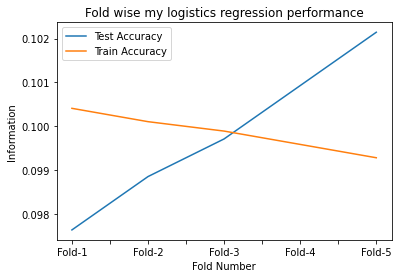

In [ ]:
final_train_accuracy = []
final_test_accuracy = []
final_class_acc_train = []
final_class_acc_test = []
for i in range(0,5):
  X_train,X_test,Y_train,Y_test = k_fold(image_data,image_labels,5,i+1)
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  model =  LogRegressionRegularizationOVR()
  model.fit(X_train,Y_train,unique_labels)
  dump(model,f'/content/drive/MyDrive/ML_Assigment2/q3_models/own_ovr_fold_{i+1}')
  #model = load(f'/content/drive/MyDrive/ML_Assigment2/q3_models/own_ovr_fold_{i+1}')
  y_pred_test = model.predict(X_test)
  test_accuracy = accuracy_score(Y_test,y_pred_test)
  class_acc = class_wise_accuracy(Y_test,y_pred_test,unique_labels)
  final_class_acc_test.append(class_acc)
  y_pred_train = model.predict(X_train)
  class_acc = class_wise_accuracy(Y_train,y_pred_train,unique_labels)
  train_accuracy = accuracy_score(Y_train,y_pred_train)
  final_class_acc_train.append(class_acc)
  final_test_accuracy.append(test_accuracy)
  final_train_accuracy.append(train_accuracy)
show_fold_loss(final_test_accuracy,final_train_accuracy)

        Test Accuracy  Train Accuracy
Fold-1       0.281046        0.255285
Fold-2       0.281046        0.255285
Fold-3       0.281046        0.255285
Fold-4       0.281046        0.255285
Fold-5       0.281046        0.255285


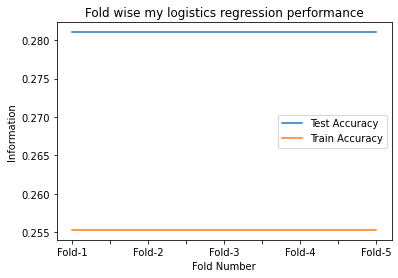

In [ ]:
final_train_accuracy = []
final_test_accuracy = []
for index in range(0,5):
  X_train,X_test,Y_train,Y_test = k_fold(db_data,labels,5,index+1)
  model = LogRegressionRegularizationOVR(X_train,Y_train,unique_labels)
  model.fit()
  y_test_pred = model.predict(X_test)
  #print(y_test_pred)
  test_accuracy = accuracy_score(Y_test,y_test_pred)
  y_train_pred = model.predict(X_train)
  #print(y_train_pred)
  train_accuracy = accuracy_score(Y_train,y_train_pred)
  final_test_accuracy.append(test_accuracy)
  final_train_accuracy.append(train_accuracy)
show_fold_loss(final_test_accuracy,final_train_accuracy)

In [ ]:
def class_wise_accuracy(y,y_pred,classes):
  class_wise_acc = []
  classes.sort()
  for each_class in classes:
    total_count = 0
    true_count = 0
    for i in range(0,len(y)):
      if y[i] == each_class:
        total_count += 1
        if y[i] == y_pred[i]:
          true_count +=1
    acc = true_count/total_count
    class_wise_acc.append(acc)
  df = pd.DataFrame({"Class" : classes, "Accuracy" : class_wise_acc})
  return df 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


        Test Accuracy  Train Accuracy
Fold-1       0.937857        0.961643
Fold-2       0.938500        0.962125
Fold-3       0.934714        0.963286
Fold-4       0.933571        0.963679
Fold-5       0.947071        0.960446


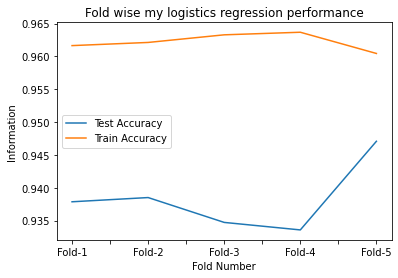

In [ ]:
final_train_accuracy = []
final_test_accuracy = []
final_class_acc_train = []
final_class_acc_test = []
for i in range(0,5):
  X_train,X_test,Y_train,Y_test = k_fold(image_data,image_labels,5,i+1)
  model = OneVsOneClassifier(LogisticRegression(penalty = "l2"))
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  model.fit(X_train,Y_train)
  dump(model,f'/content/drive/MyDrive/ML_Assigment2/q3_models/ovo_fold_{i+1}')
  #model = load(f'/content/drive/MyDrive/ML_Assigment2/q3_models/ovo_fold_{i+1}')
  y_pred_test = model.predict(X_test)
  test_accuracy = accuracy_score(Y_test,y_pred_test)
  class_acc = class_wise_accuracy(Y_test,y_pred_test,unique_labels)
  final_class_acc_test.append(class_acc)
  y_pred_train = model.predict(X_train)
  class_acc = class_wise_accuracy(Y_train,y_pred_train,unique_labels)
  train_accuracy = accuracy_score(Y_train,y_pred_train)
  final_class_acc_train.append(class_acc)
  final_test_accuracy.append(test_accuracy)
  final_train_accuracy.append(train_accuracy)
show_fold_loss(final_test_accuracy,final_train_accuracy)

In [ ]:
c=1
for i in final_class_acc_test:
  print("Test Class accuracy for fold_",c)
  print(i)
  c = c+1


Class accuracy for fold_ 1
   Class  Accuracy
0      0  0.978648
1      1  0.979021
2      2  0.904901
3      3  0.903026
4      4  0.955442
5      5  0.915987
6      6  0.968413
7      7  0.947404
8      8  0.891973
9      9  0.924123
Class accuracy for fold_ 2
   Class  Accuracy
0      0  0.966543
1      1  0.982780
2      2  0.916908
3      3  0.925052
4      4  0.943994
5      5  0.907692
6      6  0.968841
7      7  0.951477
8      8  0.904974
9      9  0.907725
Class accuracy for fold_ 3
   Class  Accuracy
0      0  0.962670
1      1  0.979375
2      2  0.924069
3      3  0.910415
4      4  0.942462
5      5  0.893482
6      6  0.948117
7      7  0.945965
8      8  0.925735
9      9  0.903887
Class accuracy for fold_ 4
   Class  Accuracy
0      0  0.979092
1      1  0.984095
2      2  0.927105
3      3  0.893151
4      4  0.940697
5      5  0.895768
6      6  0.966102
7      7  0.938514
8      8  0.897887
9      9  0.908821
Class accuracy for fold_ 5
   Class  Accuracy
0      0  

In [ ]:
c=1
for i in final_class_acc_train:
  print("Train Class accuracy for fold_",c)
  print(i)
  c = c+1

Train Class accuracy for fold_ 1
   Class  Accuracy
0      0  0.987632
1      1  0.989372
2      2  0.959274
3      3  0.944259
4      4  0.969569
5      5  0.936898
6      6  0.981762
7      7  0.962134
8      8  0.940823
9      9  0.939759
Train Class accuracy for fold_ 2
   Class  Accuracy
0      0  0.990104
1      1  0.989282
2      2  0.956118
3      3  0.941579
4      4  0.971465
5      5  0.939956
6      6  0.983624
7      7  0.963890
8      8  0.940307
9      9  0.939928
Train Class accuracy for fold_ 3
   Class  Accuracy
0      0  0.990563
1      1  0.990282
2      2  0.958169
3      3  0.942441
4      4  0.973950
5      5  0.940653
6      6  0.985555
7      7  0.964724
8      8  0.939250
9      9  0.942811
Train Class accuracy for fold_ 4
   Class  Accuracy
0      0  0.990210
1      1  0.990107
2      2  0.955890
3      3  0.946312
4      4  0.972420
5      5  0.940441
6      6  0.984236
7      7  0.965078
8      8  0.942461
9      9  0.944019
Train Class accuracy for fold_ 5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


        Test Accuracy  Train Accuracy
Fold-1       0.915571        0.928536
Fold-2       0.916214        0.928446
Fold-3       0.911000        0.929518
Fold-4       0.911929        0.930161
Fold-5       0.924143        0.926018


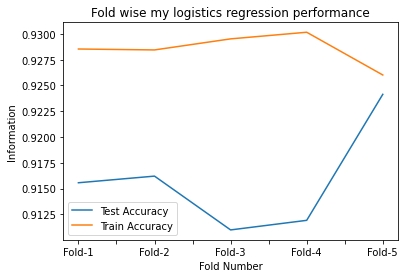

In [ ]:
final_train_accuracy = []
final_test_accuracy = []
final_class_acc_train = []
final_class_acc_test = []
for i in range(0,5):
  X_train,X_test,Y_train,Y_test = k_fold(image_data,image_labels,5,i+1)
  model = LogisticRegression(multi_class = 'ovr',penalty = "l2")
  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  model.fit(X_train,Y_train)
  #dump(model,f'/content/drive/MyDrive/ML_Assigment2/q3_models/ovr_fold_{i+1}')
  #model = load(f'/content/drive/MyDrive/ML_Assigment2/q3_models/ovr_fold_{i+1}')
  y_pred_test = model.predict(X_test)
  test_accuracy = accuracy_score(Y_test,y_pred_test)
  class_acc = class_wise_accuracy(Y_test,y_pred_test,unique_labels)
  final_class_acc_test.append(class_acc)
  y_pred_train = model.predict(X_train)
  class_acc = class_wise_accuracy(Y_train,y_pred_train,unique_labels)
  train_accuracy = accuracy_score(Y_train,y_pred_train)
  final_class_acc_train.append(class_acc)
  final_test_accuracy.append(test_accuracy)
  final_train_accuracy.append(train_accuracy)
show_fold_loss(final_test_accuracy,final_train_accuracy)

In [ ]:
c=1
for i in final_class_acc_test:
  print("Test Class accuracy for fold_",c)
  print(i)
  c = c+1

Test Class accuracy for fold_ 1
   Class  Accuracy
0      0  0.972242
1      1  0.971392
2      2  0.883687
3      3  0.874828
4      4  0.934259
5      5  0.876835
6      6  0.959799
7      7  0.933918
8      8  0.840210
9      9  0.893343
Test Class accuracy for fold_ 2
   Class  Accuracy
0      0  0.969517
1      1  0.974785
2      2  0.890896
3      3  0.896600
4      4  0.921150
5      5  0.865385
6      6  0.947101
7      7  0.940225
8      8  0.861915
9      9  0.881974
Test Class accuracy for fold_ 3
   Class  Accuracy
0      0  0.961953
1      1  0.968750
2      2  0.889685
3      3  0.877640
4      4  0.923525
5      5  0.866455
6      6  0.943141
7      7  0.930526
8      8  0.866176
9      9  0.867845
Test Class accuracy for fold_ 4
   Class  Accuracy
0      0  0.981255
1      1  0.978794
2      2  0.900920
3      3  0.855479
4      4  0.927354
5      5  0.858934
6      6  0.960943
7      7  0.919595
8      8  0.851408
9      9  0.879170
Test Class accuracy for fold_ 5
   C

In [ ]:
c=1
for i in final_class_acc_train:
  print("Train Class accuracy for fold_",c)
  print(i)
  c = c+1

Train Class accuracy for fold_ 1
   Class  Accuracy
0      0  0.979083
1      1  0.978744
2      2  0.912858
3      3  0.901354
4      4  0.940788
5      5  0.884804
6      6  0.961700
7      7  0.940964
8      8  0.880371
9      9  0.895163
Train Class accuracy for fold_ 2
   Class  Accuracy
0      0  0.981648
1      1  0.978403
2      2  0.912415
3      3  0.897719
4      4  0.941650
5      5  0.886894
6      6  0.964156
7      7  0.939874
8      8  0.876780
9      9  0.894784
Train Class accuracy for fold_ 3
   Class  Accuracy
0      0  0.982577
1      1  0.979449
2      2  0.909903
3      3  0.902393
4      4  0.943680
5      5  0.887438
6      6  0.963247
7      7  0.942740
8      8  0.878683
9      9  0.895544
Train Class accuracy for fold_ 4
   Class  Accuracy
0      0  0.979514
1      1  0.978486
2      2  0.911781
3      3  0.906002
4      4  0.942283
5      5  0.889418
6      6  0.959775
7      7  0.943575
8      8  0.881036
9      9  0.898556
Train Class accuracy for fold_ 5